# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Natan 7259

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy as sp

In [5]:
data_train = pd.read_csv('wine_train.csv')

In [6]:
data_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [8]:
X_train = data_train.drop(columns=['target'])
y_train = data_train['target']

In [9]:
print(data_train.duplicated().sum(), "duplicates\n")
data_train.info()
data_train.describe()


0 duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    floa

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


As we can see, the data is complete and there are no missing values.

Now we will check the correlations and determine if there are any features that are highly correlated with each other and with the target value.

Note: The default seaborn color palette actually looks like wine, but it's a bit hard on the eyes, so we will use the 'bright' palette instead.

In [10]:
palette = 'bright'

In [11]:
corr = data_train.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


<Axes: >

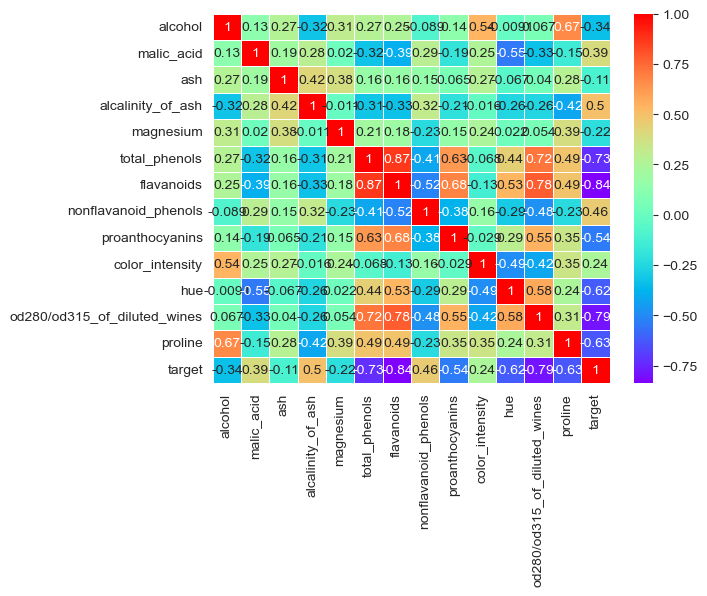

In [12]:
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='rainbow')

A little hard on the eyes, but we can clearly see now that some values have a correlation values at least above 0.7.
We can test other thresholds as well, but for now we will stick with 0.7.

We can also see that the target value has a high correlation with many of the features, which is great!

Now let's filter them out.

In [13]:
correlation_threshold = 0.7

In [14]:
# Select only highly correlated features
highcorr = corr[(corr.abs() > correlation_threshold) & (corr != 1)].dropna(how='all').dropna(axis=1, how='all')
highcorr

,total_phenols,flavanoids,od280/od315_of_diluted_wines,target
total_phenols,NaN,0.869634,0.716507,-0.726069
flavanoids,0.869634,NaN,0.781781,-0.838060
od280/od315_of_diluted_wines,0.716507,0.781781,NaN,-0.788087
target,-0.726069,-0.838060,-0.788087,NaN


In [15]:
highcorr_abs = highcorr.abs()
highcorr_abs

,total_phenols,flavanoids,od280/od315_of_diluted_wines,target
total_phenols,NaN,0.869634,0.716507,0.726069
flavanoids,0.869634,NaN,0.781781,0.838060
od280/od315_of_diluted_wines,0.716507,0.781781,NaN,0.788087
target,0.726069,0.838060,0.788087,NaN


Text(0.5, 1.02, 'Pairplot of highly correlated features')

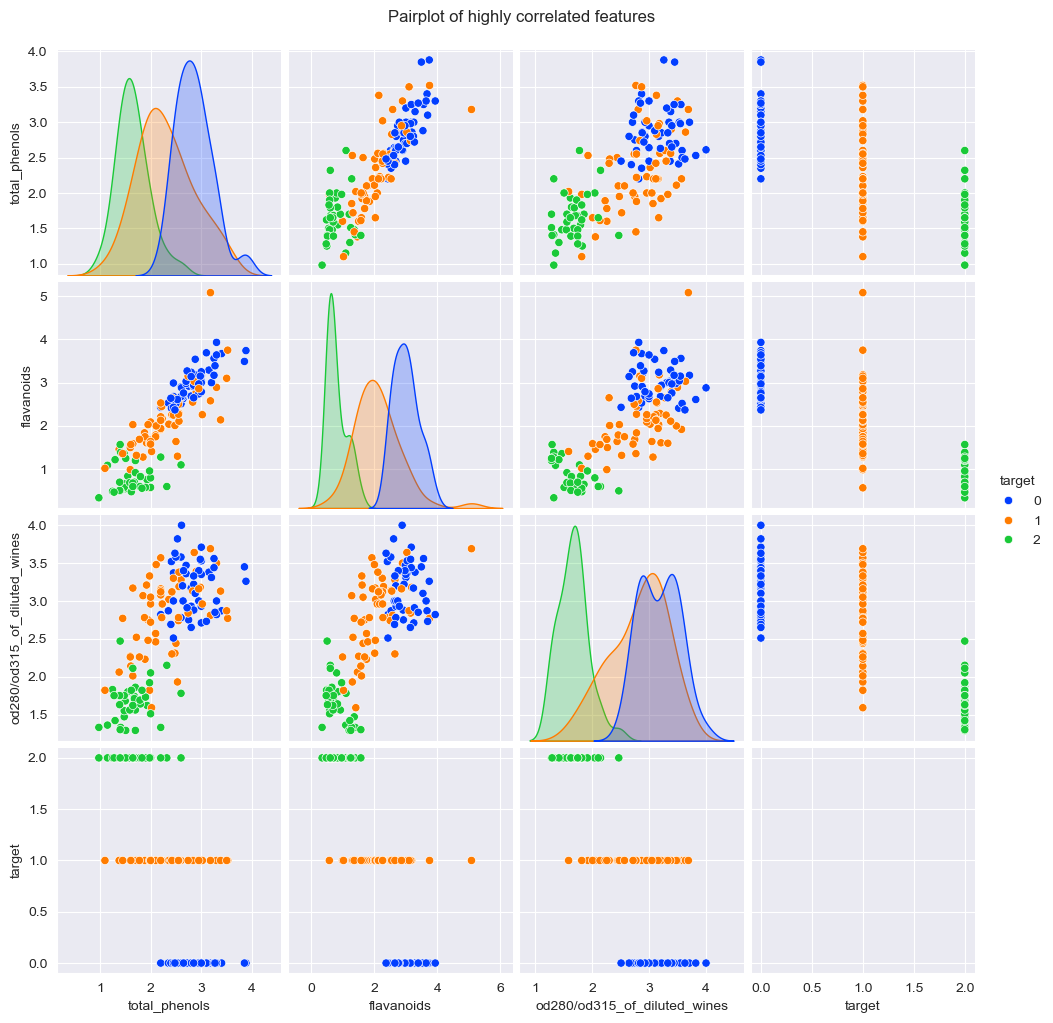

In [16]:
sns.pairplot(data_train, hue='target', height=2.5, vars=highcorr.index, palette=palette).fig.suptitle(
    'Pairplot of highly correlated features', y=1.02)

Interesting finding! We can see here that correlation is in fact transitive, meaning that there are entire groups of features that are highly correlated with each other and with the target value!

We have a couple of options here:
For example, we can remove all but one of the highly correlated features, preferable the one with the highest correlation with the target to reduce overfitting.
We will try different options in the next part.

In [17]:
# Calculate correlation of each feature with the target
target_corr = highcorr_abs['target']
most_corr = highcorr_abs.drop(columns=['target'])

print("The highest correlation with the target is: ", target_corr.idxmax(), '\n')

# Iterate through the highly correlated features
for feature in most_corr.index:
    if feature == 'target':
        continue
    correlated_feature = most_corr.loc[feature].idxmax()
    if target_corr[feature] > target_corr[correlated_feature]:
        print(f"{feature} has a higher correlation with the target than {correlated_feature}")
    else:
        print(f"{feature} has a higher correlation with {correlated_feature} than with the target")

The highest correlation with the target is:  flavanoids 

total_phenols has a higher correlation with flavanoids than with the target
flavanoids has a higher correlation with the target than total_phenols
od280/od315_of_diluted_wines has a higher correlation with flavanoids than with the target


We can see that the feature 'flavanoids' has a higher correlation with the target than with all other features, and also is more correlated with the other features than they are with each other. So it makes for a great candidate to keep.

Also to note, in the pair plot above, we can see that the values of the feature 'flavnoids' for different target classes have very little overlap, which is a great sign for classification.

In [18]:
low_corr = corr[(corr['target'].abs() < 0.3)].dropna(how='all')[['target']]
low_corr

,target
ash,-0.109604
magnesium,-0.215107
color_intensity,0.236329


On the other hand, here we can see some features than are not very correlated with the target value, so we may consider removing them.

Now let's see about the outliers.
First, we start for some general plots to visually see the outliers and their distribution across the features.

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

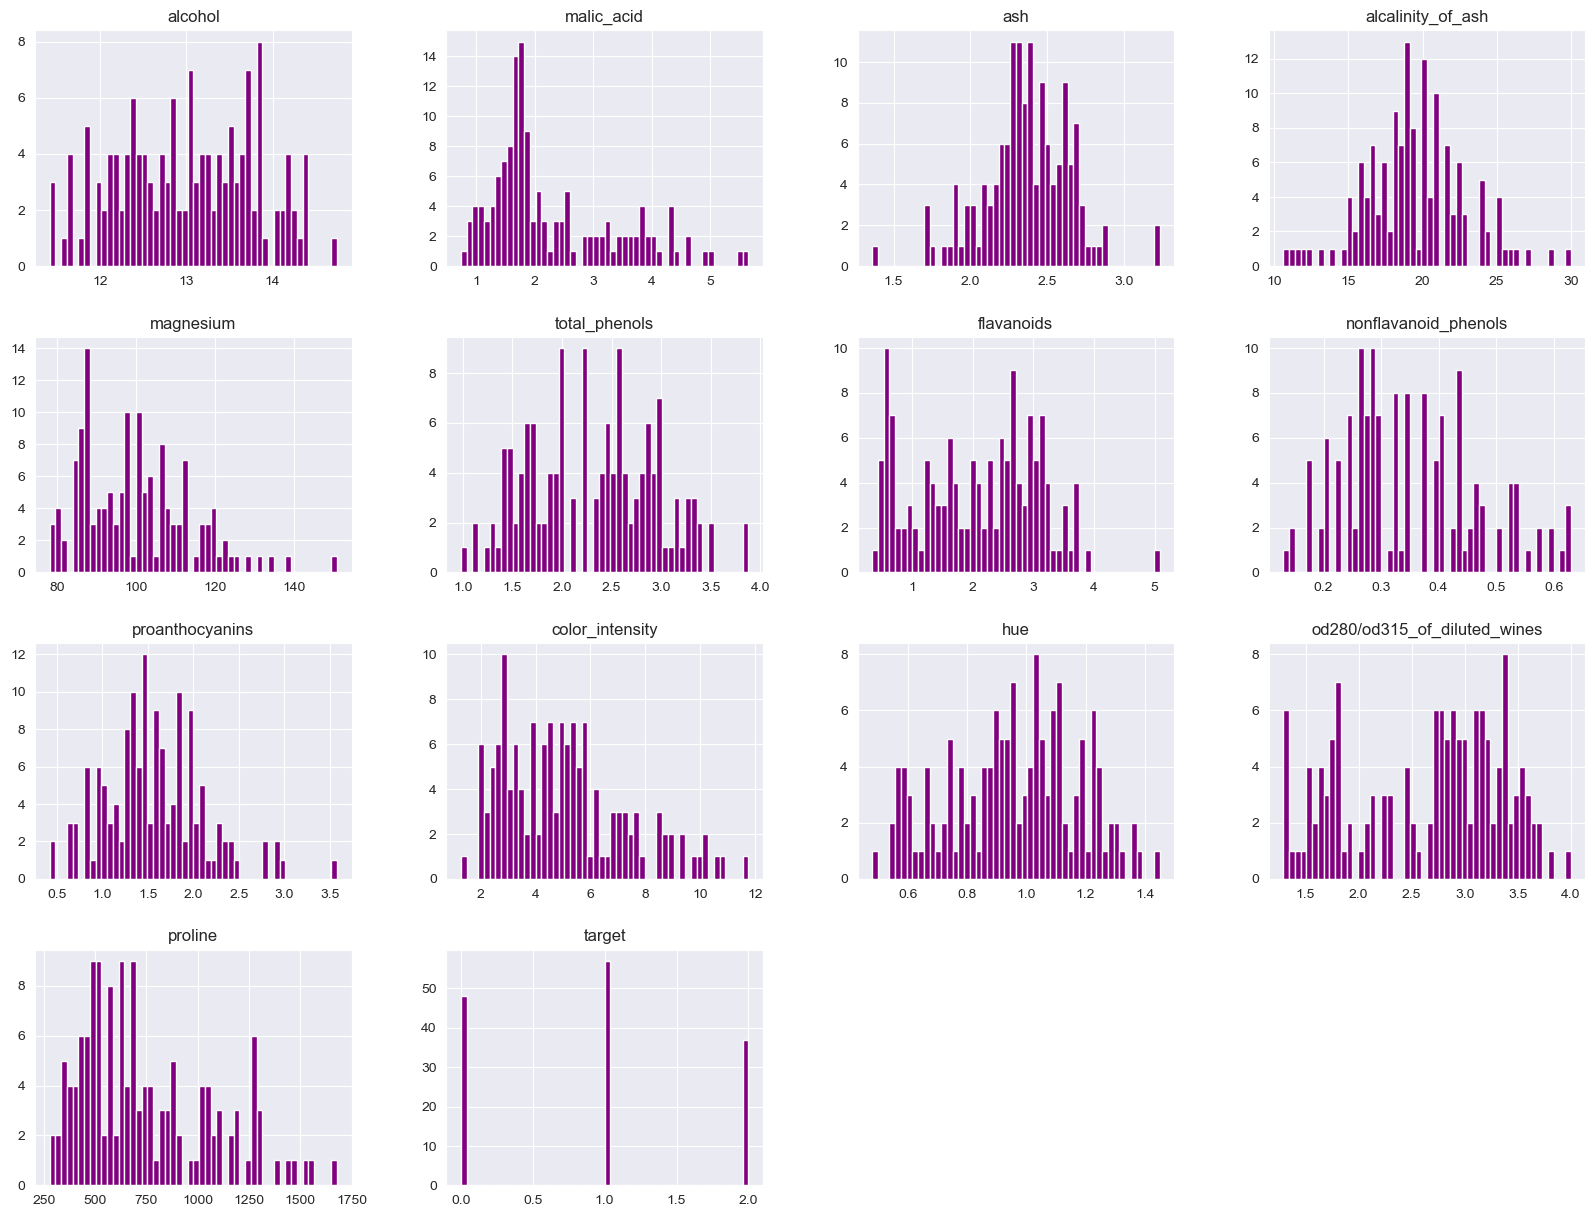

In [19]:
data_train.hist(bins=50, figsize=(20, 15), color='purple')

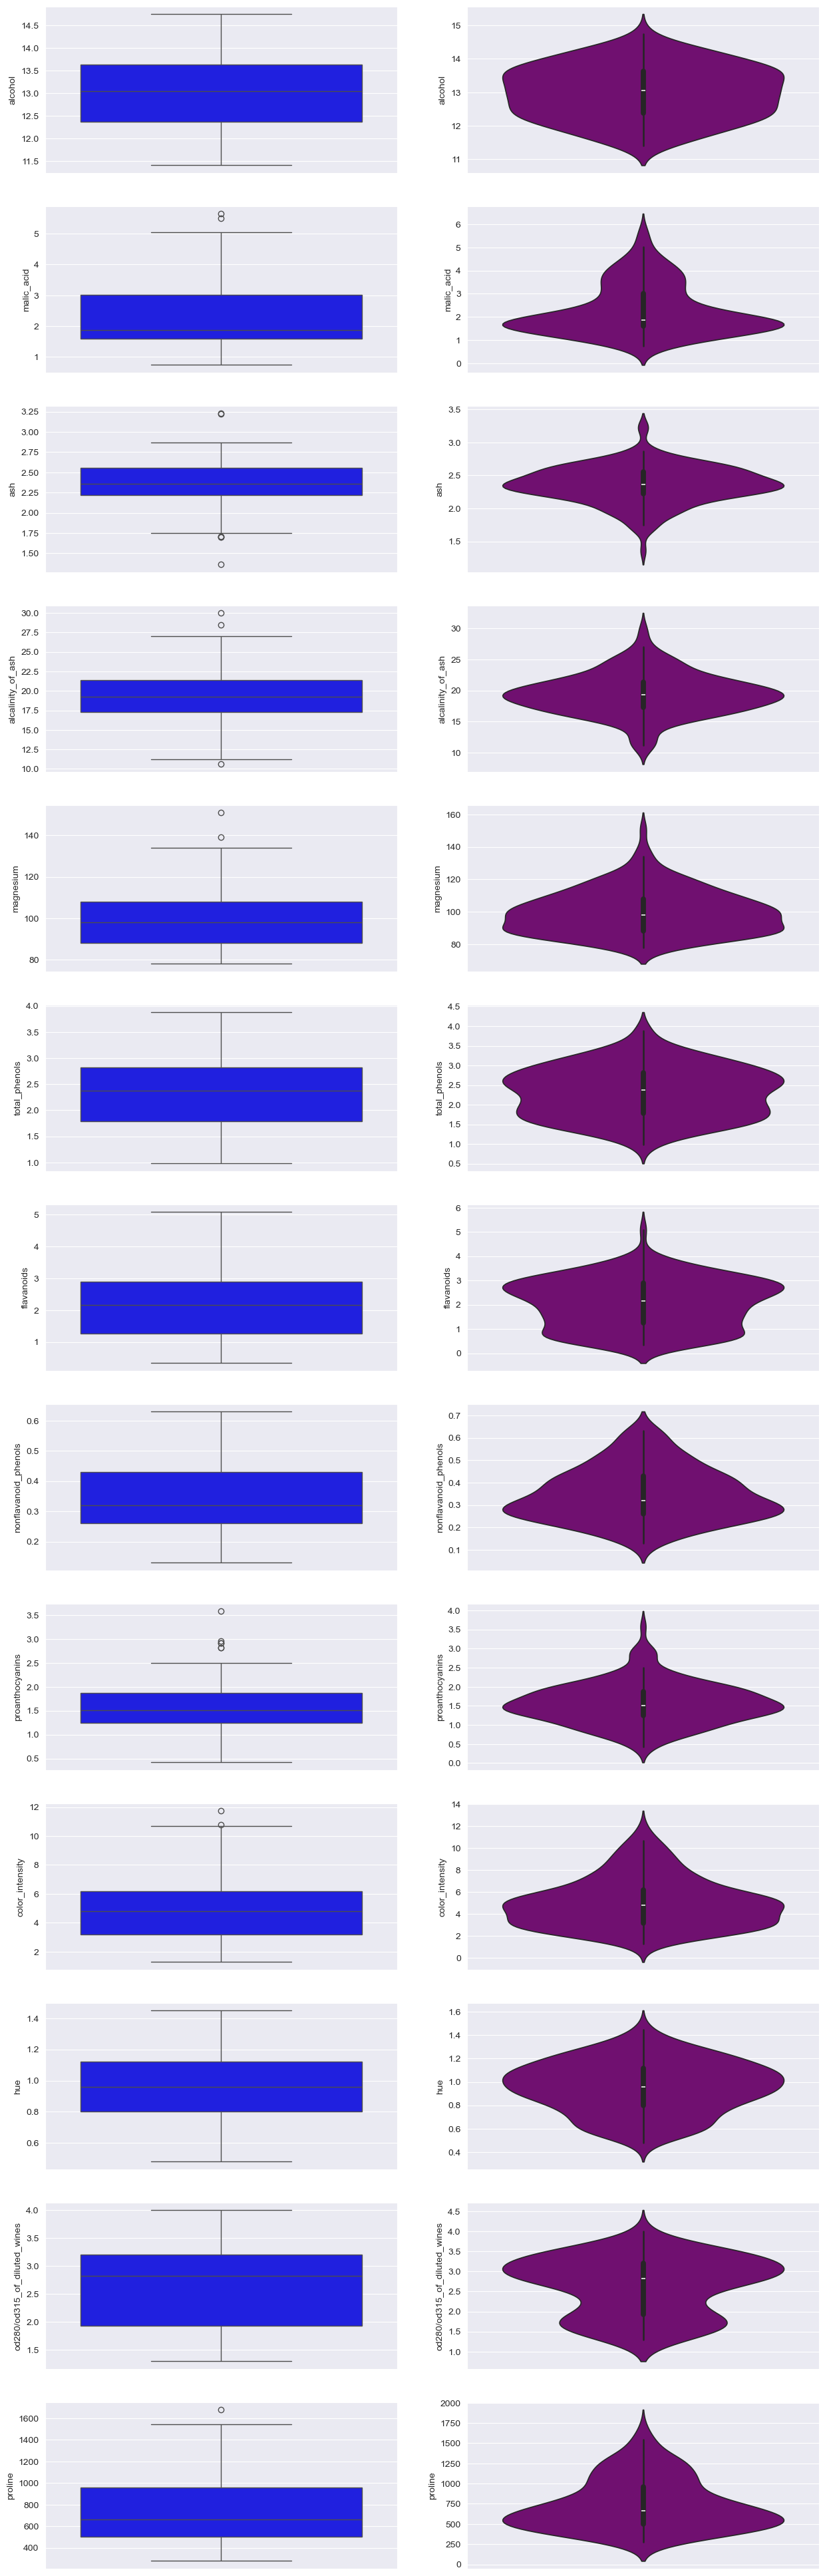

In [20]:
fig, ax = plt.subplots(len(X_train.columns), 2, figsize=(15, 50))
for i, feature in enumerate(X_train.columns):
    sns.boxplot(y=feature, data=data_train, ax=ax[i, 0], color='blue')
    sns.violinplot(y=feature, data=data_train, ax=ax[i, 1], color='purple')

Now let's calculate the number of outliers for each feature and take a closer look at them.

In [21]:
outliers_dict = {}
for feature in X_train.columns:
    Q1 = data_train[feature].quantile(0.25)
    Q3 = data_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = data_train[(data_train[feature] < lower_bound) | (data_train[feature] > upper_bound)].shape[0]
    if outliers_count > 0:
        outliers_dict[feature] = outliers_count
outliers_dict

{'malic_acid': 2,
 'ash': 6,
 'alcalinity_of_ash': 3,
 'magnesium': 2,
 'proanthocyanins': 6,
 'color_intensity': 2,
 'proline': 1}

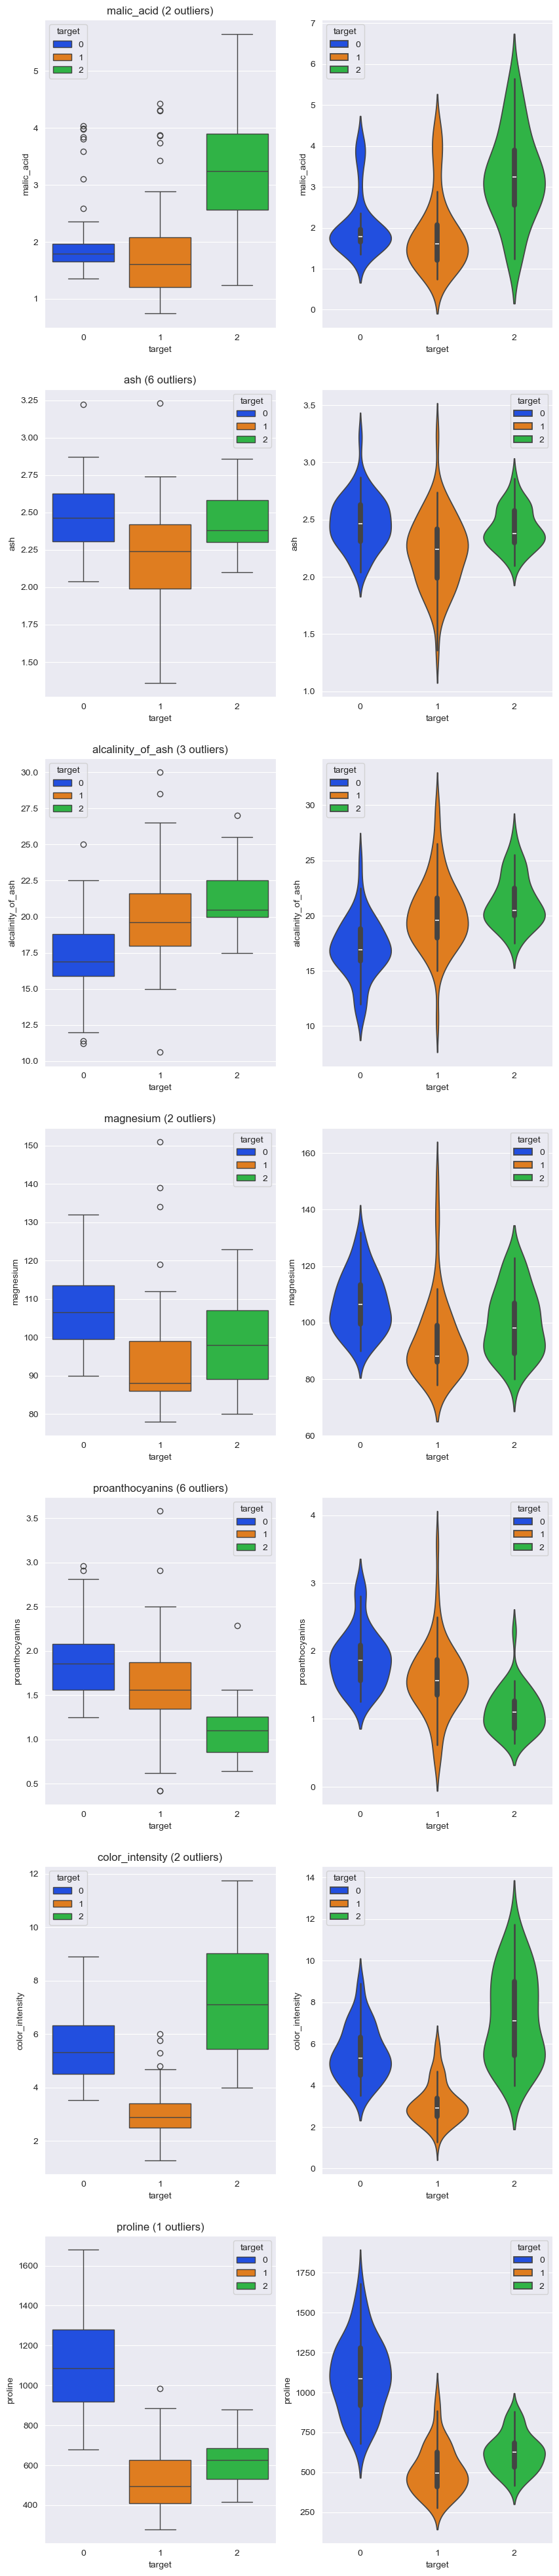

In [22]:
ax: plt.Axes
fig, ax = plt.subplots(len(outliers_dict), 2, figsize=(10, 50))
for i, feature in enumerate(outliers_dict.keys()):
    ax[i, 0].set_title(feature + f" ({outliers_dict[feature]} outliers)")
    sns.boxplot(y=feature, x='target', data=data_train, ax=ax[i, 0], hue='target', palette=palette)
    sns.violinplot(y=feature, x='target', data=data_train, ax=ax[i, 1], hue='target', palette=palette)

We can see that some outliers are distributed evenly across the target values, while others are more concentrated within a single target value. On one hand those may be worth keeping, because they can tell us something about the target value, but on the other hand they may cause confusion.

For example, we can see that the outliers of the feature 'color_intensity' are mostly concentrated in target value 1, but their values fall into the category of target value 2.

At the same time, the feature 'magnesium' has multiple outliers that are also concentrated in target value 1, but unlike their counterparts in 'color-intensity', their values exceed the values of the target values 0 and 2, so they may be telling us something unique about target value 1.

It is worth investigating in the feature engineering part.

## Part 3 - Experiments
You could add as many code cells as needed

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline

In [24]:
data_train = pd.read_csv('wine_train.csv')
X_train = data_train.drop(columns=['target'])
y_train = data_train['target']

In [26]:
def drop_high_corr(x: pd.DataFrame) -> pd.DataFrame:
    return x.drop(columns=['total_phenols', 'od280/od315_of_diluted_wines'])


def drop_low_corr(x: pd.DataFrame) -> pd.DataFrame:
    return x.drop(columns=['ash', 'color_intensity', 'magnesium'])


def clean_outliers(x: pd.DataFrame, y: pd.Series) -> (pd.DataFrame, pd.Series):
    for feature in x.columns:
        Q1 = x[feature].quantile(0.25)
        Q3 = x[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (x[feature] >= lower_bound) & (x[feature] <= upper_bound)
        x = x[mask]
        y = y[mask]
    return x, y


def clean_outliers_keep_magnesium(x: pd.DataFrame, y: pd.Series) -> (pd.DataFrame, pd.Series):
    for feature in x.columns:
        if feature == 'magnesium':
            continue
        Q1 = x[feature].quantile(0.25)
        Q3 = x[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (x[feature] >= lower_bound) & (x[feature] <= upper_bound)
        x = x[mask]
        y = y[mask]
    return x, y

In [27]:
truth = [[False, False, False],
         [False, False, True],
         [False, True, False],
         [False, True, True],
         [True, False, False],
         [True, False, True],
         [True, True, False],
         [True, True, True]]

variants = {}

# Let's add variants with all possible combinations of feature engineering
for t in truth:
    X_train_modified = X_train.copy()
    y_train_modified = y_train.copy()
    name = ''
    if t == [False, False, False]:
        name = 'No feature engineering'
    if t[0]:
        X_train_modified = drop_high_corr(X_train_modified)
        name += '- Removed highly correlated features\n'
    if t[1]:
        X_train_modified = drop_low_corr(X_train_modified)
        name += '- Removed low correlated features\n'
    if t[2]:
        X_train_modified, y_train_modified = clean_outliers(X_train_modified, y_train_modified)
        name += '- Cleaned outliers'
    if name.endswith('\n'):
        name = name[:-1]
    variants[name] = (X_train_modified, y_train_modified)

# Let's add a couple of more variants
variants['- Cleaned outliers\n- Kept magnesium'] = clean_outliers_keep_magnesium(X_train.copy(), y_train.copy())
variants['- Cleaned outliers\n- Kept magnesium\n- Removed highly correlated features'] = clean_outliers_keep_magnesium(
    drop_high_corr(X_train.copy()), y_train.copy())

for key in variants.keys():
    print(key)
    print('_' * 50)


No feature engineering
__________________________________________________
- Cleaned outliers
__________________________________________________
- Removed low correlated features
__________________________________________________
- Removed low correlated features
- Cleaned outliers
__________________________________________________
- Removed highly correlated features
__________________________________________________
- Removed highly correlated features
- Cleaned outliers
__________________________________________________
- Removed highly correlated features
- Removed low correlated features
__________________________________________________
- Removed highly correlated features
- Removed low correlated features
- Cleaned outliers
__________________________________________________
- Cleaned outliers
- Kept magnesium
__________________________________________________
- Cleaned outliers
- Kept magnesium
- Removed highly correlated features
_________________________________________________

In [29]:
piplines = {
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]),
    'NaiveBayes': Pipeline([('scaler', StandardScaler()), ('NaiveBayes', GaussianNB())])
}

param_grids = {
    'RandomForest': {
        'RandomForest__max_depth': [None, 5, 10, 15, 20],
        'RandomForest__n_estimators': [10, 50, 100, 200],
        'RandomForest__min_samples_split': [2, 5, 10, 15],
    },
    'KNN': {
        'KNN__n_neighbors': [3, 5, 7],
        'KNN__weights': ['uniform', 'distance'],
        'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'NaiveBayes': {
        'NaiveBayes__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

f1_macro = make_scorer(f1_score, average='macro')

In [30]:
results = []
for model, pipeline in piplines.items():
    best_variant_result = {}
    for name, (X, y) in variants.items():
        grid_search = GridSearchCV(pipeline, param_grids[model], cv=10, n_jobs=-1, verbose=0, scoring=f1_macro)
        grid_search.fit(X, y)

        if not best_variant_result or grid_search.best_score_ > best_variant_result['best_score']:
            best_variant_result = {
                'model': model,
                'best_dataset': name,
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_
            }
    results.append(best_variant_result)

for result in results:
    print(result['model'])
    print("Best Dataset:")
    print(result['best_dataset'])
    print("Best Parameters:", result['best_params'])
    print("Best Score:", result['best_score'])
    print("_" * 70)

RandomForest
Best Dataset:
- Removed highly correlated features
- Removed low correlated features
Best Parameters: {'RandomForest__max_depth': 5, 'RandomForest__min_samples_split': 10, 'RandomForest__n_estimators': 100}
Best Score: 0.9932659932659933
______________________________________________________________________
KNN
Best Dataset:
- Cleaned outliers
Best Parameters: {'KNN__algorithm': 'auto', 'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
Best Score: 0.9830687830687831
______________________________________________________________________
NaiveBayes
Best Dataset:
- Cleaned outliers
- Kept magnesium
Best Parameters: {'NaiveBayes__var_smoothing': 1e-09}
Best Score: 0.9833333333333334
______________________________________________________________________


It is clear from here that Random Forest yields the best results, however the best dataset and parameters are inconclusive. We should take a closer look at it separately.

In [31]:
RF_params = {
    'RandomForest__max_depth': [None, 5, 10, 15, 20, 30],
    'RandomForest__n_estimators': [10, 20, 40, 50, 80, 100, 150, 200],
    'RandomForest__min_samples_split': [2, 5, 10, 15, 20]
}
rf_grid_search = GridSearchCV(piplines['RandomForest'], RF_params, cv=10, n_jobs=-1, verbose=2, scoring=f1_macro)
for name, (X, y) in variants.items():
    print("Dataset:")
    print(name)
    rf_grid_search.fit(X, y)
    print("Best Parameters:", rf_grid_search.best_params_)
    print("Best Score:", rf_grid_search.best_score_)
    print("_" * 70)

Dataset:
No feature engineering
Fitting 10 folds for each of 240 candidates, totalling 2400 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'RandomForest__max_depth': 15, 'RandomForest__min_samples_split': 20, 'RandomForest__n_estimators': 50}
Best Score: 0.9866666666666667
______________________________________________________________________
Dataset:
- Cleaned outliers
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best Parameters: {'RandomForest__max_depth': 5, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 20}
Best Score: 0.9915343915343915
______________________________________________________________________
Dataset:
- Removed low correlated features
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best Parameters: {'RandomForest__max_depth': 30, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 40}
Best Score: 0.9865319865319865
______________________________________________________________________
Dataset:
- Removed low correlated features
- Cleaned outliers
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Bes

Still largely inconclusive, but we see some patterns emerging. For example, the best dataset seems to be the one with all 3 feature engineering steps.
Either we don't have enough data, or the impact of the parameters is not as significant as we thought in this case.
Just to be sure, let's take another look on the heatmap of the modified dataset.


<Axes: >

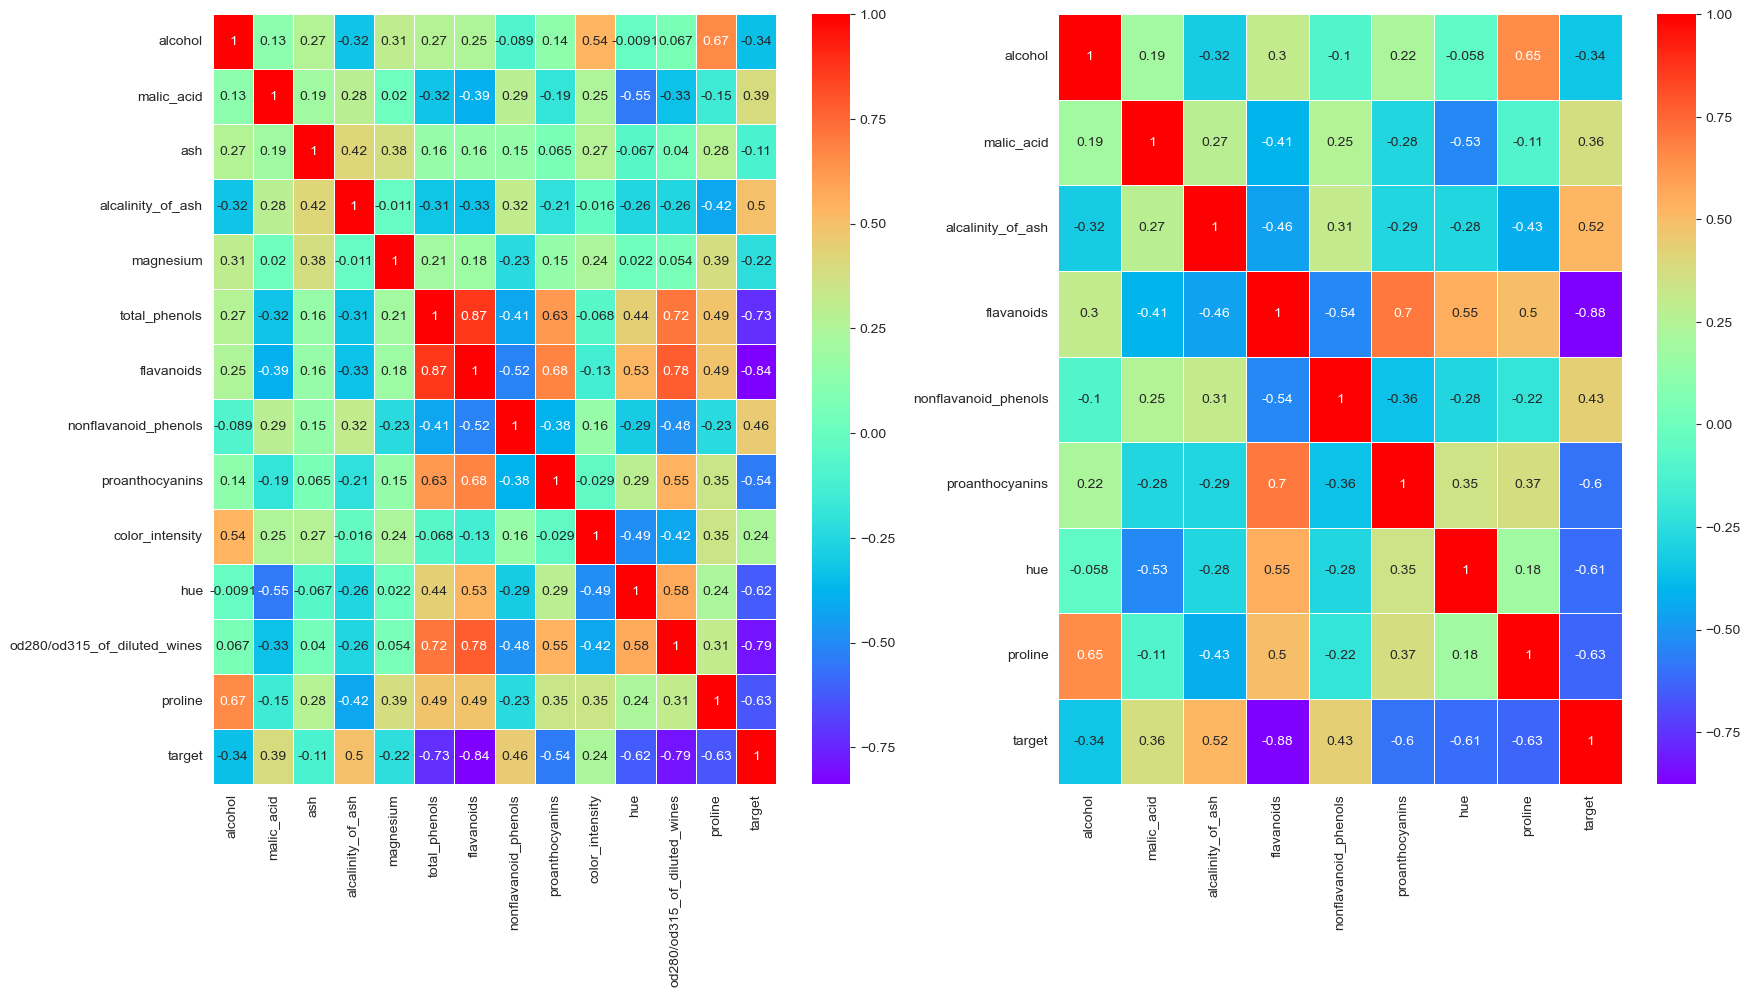

In [32]:
data_modified = drop_high_corr(data_train)
data_modified = drop_low_corr(data_modified)
data_modified, _ = clean_outliers(data_modified, data_modified['target'])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

corr = data_train.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='rainbow', ax=ax[0])

corr = data_modified.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='rainbow', ax=ax[1])

In [33]:
data_train = pd.read_csv('wine_train.csv')
X_train = data_train.drop(columns=['target'])
y_train = data_train['target']

x_train_modified = drop_high_corr(X_train)
x_train_modified = drop_low_corr(x_train_modified)
x_train_modified, y_train_modified = clean_outliers(x_train_modified, y_train)

for i in range(5):
    search = GridSearchCV(piplines['RandomForest'], RF_params, cv=10, n_jobs=-1, verbose=2, scoring=f1_macro).fit(x_train_modified, y_train_modified)
    print(search.best_params_)
    print(search.best_score_)
    print("_" * 70)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
{'RandomForest__max_depth': 15, 'RandomForest__min_samples_split': 10, 'RandomForest__n_estimators': 50}
1.0
______________________________________________________________________
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
{'RandomForest__max_depth': 10, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 40}
1.0
______________________________________________________________________
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
{'RandomForest__max_depth': 10, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 40}
1.0
______________________________________________________________________
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
{'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 100}
1.0
______________________________________________________________________
Fitting 10 folds for

Well, looks like the results with the modified dataset are consistently 100% f1 score, but the parameters are still inconclusive. Perhaps they really are not as significant as we thought, and we should just go with the default ones.

In [34]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
GridSearchCV(piplines['RandomForest'], {}, cv=10, n_jobs=-1, verbose=2, scoring=f1_macro).fit(x_train_modified, y_train_modified).best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9925925925925926

In [51]:
GridSearchCV(piplines['RandomForest'], {}, cv=10, n_jobs=-1, verbose=2, scoring=f1_macro).fit(X_train, y_train).best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9727777777777777

Even with the default settings, we can see that the variance of RandomForest is ridiculous, everything between 0.96 and 1.0. We can't really say which one is the best, but we can say that the model is overall pretty good. At least with the parameters I tested with.

Still, the feature engineering provides a small improvement, so we should go with that.

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [68]:
data_train = pd.read_csv('wine_train.csv')
X_train = data_train.drop(columns=['target'])
y_train = data_train['target']

X_train = drop_high_corr(X_train)
X_train = drop_low_corr(X_train)
X_train, y_train = clean_outliers(X_train, y_train)

pipeline = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier())]).fit(X_train, y_train)

## Part 5 - Apply on test and show model performance estimation

In [69]:
data_test = pd.read_csv('wine_test.csv')
X_test = data_test.drop(columns=['target'])
y_test = data_test['target']

X_test = drop_high_corr(X_test)
X_test = drop_low_corr(X_test)



pred = pipeline.predict(X_test)

In [70]:
pred_vs_actual = pd.DataFrame({'predicted': pred, 'actual': y_test, 'correct': pred == y_test})
pred_vs_actual

,predicted,actual,correct
0,2,2,True
1,0,0,True
2,2,2,True
3,1,1,True
4,2,2,True
5,1,1,True
6,0,0,True
7,1,1,True
8,1,1,True
9,1,1,True


In [55]:
pd.DataFrame(classification_report(y_test, pred, output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.928571,0.962963,14.000000
2,0.916667,1.000000,0.956522,11.000000
accuracy,0.972222,0.972222,0.972222,0.972222
macro avg,0.972222,0.976190,0.973162,36.000000
weighted avg,0.974537,0.972222,0.972312,36.000000


In [57]:
pd.DataFrame(confusion_matrix(y_test, pred))

,0,1,2
0,11,0,0
1,0,13,1
2,0,0,11


In [58]:
data_test.loc[22]

alcohol                          12.77
malic_acid                        3.43
ash                               1.98
alcalinity_of_ash                16.00
magnesium                        80.00
total_phenols                     1.63
flavanoids                        1.25
nonflavanoid_phenols              0.43
proanthocyanins                   0.83
color_intensity                   3.40
hue                               0.70
od280/od315_of_diluted_wines      2.12
proline                         372.00
target                            1.00
Name: 22, dtype: float64